# **Import libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno 

import sys
# locate the folder which stores the custom package using relative path
sys.path.append('../../../../src')

import explore_stats as xstats
import explore_stock as xstock
import handling_datetime as hdt
import handling_dataframe as hdf
import config_snippets as config_snp


In [3]:
df_raw_finance = pd.read_csv("..//..//..//..//data//raw//finance.csv")

# Display dataframe
df_raw_finance

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,vietnameseName
0,26,CRE,2023-09-08,15:09:03,HOSE,STOCK,10.60,11.30,9.86,10.60,...,10.400,10.490,1999100.0,2.096305e+10,0.0,0.000000e+00,-0.20,-0.2000,-1.8868,Tài chính
1,41,VPB,2023-09-08,15:09:03,HOSE,STOCK,21.75,23.25,20.25,21.75,...,21.800,21.790,16766200.0,3.653255e+11,24024000.0,5.006265e+11,0.05,0.0500,0.2299,Tài chính
2,44,PHS,2023-09-08,15:09:01,UPCOM,STOCK,13.70,15.70,11.70,13.80,...,13.800,13.800,3000.0,4.140000e+07,0.0,0.000000e+00,0.10,0.1000,0.7299,Tài chính
3,45,IDJ,2023-09-08,15:09:03,HNX,STOCK,8.20,9.00,7.40,8.20,...,8.100,8.130,2587121.0,2.103437e+10,0.0,0.000000e+00,-0.10,-0.1000,-1.2195,Tài chính
4,46,STL,2023-09-08,15:09:01,UPCOM,STOCK,1.50,1.70,1.30,1.50,...,1.500,1.358,20850.0,2.830500e+07,0.0,0.000000e+00,0.00,0.0000,0.0000,Tài chính
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436680,3599903,EIB,2019-07-31,15:07:03,HOSE,STOCK,17.95,19.20,16.70,17.60,...,14.958,14.958,234630.0,4.210885e+09,0.0,0.000000e+00,0.00,0.0000,0.0000,Tài chính
436681,3599911,IDV,2019-07-31,15:07:04,HNX,STOCK,35.00,38.50,31.50,35.00,...,18.427,18.424,7810.0,2.733060e+08,0.0,0.000000e+00,0.00,0.0000,0.0000,Tài chính
436682,3599957,IDC,2019-07-31,15:07:02,UPCOM,STOCK,19.00,21.80,16.20,19.00,...,14.744,14.744,0.0,0.000000e+00,0.0,0.000000e+00,0.00,0.0000,0.0000,Tài chính
436683,3599996,TIP,2019-07-31,15:07:03,HOSE,STOCK,38.50,41.15,35.85,38.50,...,28.344,28.287,59530.0,2.284198e+09,0.0,0.000000e+00,-0.05,-0.0369,-0.1299,Tài chính


In [4]:
df_raw_tech = pd.read_csv("..//..//..//..//data//raw//tech.csv")

# Display dataframe
df_raw_tech

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,vietnameseName
0,19,HIG,2023-09-08,15:09:01,UPCOM,STOCK,8.3,9.5,7.1,8.3,...,8.300,8.300,1003.0,8.324300e+06,0.0,0.0,0.00,0.0000,0.0000,Công nghệ
1,28,PMT,2023-09-08,15:09:01,UPCOM,STOCK,6.9,7.9,5.9,6.9,...,6.900,6.900,0.0,0.000000e+00,0.0,0.0,0.00,0.0000,0.0000,Công nghệ
2,94,POT,2023-09-08,15:09:03,HNX,STOCK,18.6,20.4,16.8,18.6,...,18.600,18.600,632.0,1.174260e+07,0.0,0.0,0.00,0.0000,0.0000,Công nghệ
3,98,ELC,2023-09-08,15:09:03,HOSE,STOCK,23.4,25.0,21.8,23.5,...,24.050,23.810,497800.0,1.185210e+10,0.0,0.0,0.65,0.6500,2.7778,Công nghệ
4,198,ONW,2023-09-08,15:09:01,UPCOM,STOCK,3.8,4.3,3.3,3.8,...,3.800,3.800,6900.0,2.622000e+07,0.0,0.0,0.00,0.0000,0.0000,Công nghệ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90579,3599929,PMJ,2019-07-31,15:07:02,UPCOM,STOCK,14.6,16.7,12.5,14.6,...,10.780,10.780,0.0,0.000000e+00,0.0,0.0,0.00,0.0000,0.0000,Công nghệ
90580,3599943,PMT,2019-07-31,15:07:02,UPCOM,STOCK,4.9,5.6,4.2,4.9,...,4.072,4.072,0.0,0.000000e+00,0.0,0.0,0.00,0.0000,0.0000,Công nghệ
90581,3599949,ONE,2019-07-31,15:07:04,HNX,STOCK,4.1,4.5,3.7,4.3,...,3.217,3.217,900.0,3.870000e+06,0.0,0.0,0.20,0.1496,4.8780,Công nghệ
90582,3599958,SBD,2019-07-31,15:07:02,UPCOM,STOCK,9.5,10.9,8.1,9.5,...,7.598,7.598,0.0,0.000000e+00,0.0,0.0,0.00,0.0000,0.0000,Công nghệ


In [5]:
df_raw_consumer_good = pd.read_csv("..//..//..//..//data//raw//consumer_good.csv")

# Display dataframe
df_raw_consumer_good

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,vietnameseName
0,3,VTQ,2023-09-08,15:09:01,UPCOM,STOCK,38.3,53.6,23.0,38.3,...,38.300,38.300,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0000,0.0000,Hàng tiêu dùng
1,13,NGC,2023-09-08,15:09:01,UPCOM,STOCK,3.4,3.9,2.9,3.4,...,3.400,3.400,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0000,0.0000,Hàng tiêu dùng
2,35,DRC,2023-09-08,15:09:03,HOSE,STOCK,23.1,24.7,21.5,23.1,...,23.400,23.430,474800.0,1.112236e+10,298000.0,6.854000e+09,0.3,0.3000,1.2987,Hàng tiêu dùng
3,36,NAF,2023-09-08,15:09:03,HOSE,STOCK,17.2,18.4,16.0,17.2,...,17.200,17.200,93100.0,1.601580e+09,0.0,0.000000e+00,0.0,0.0000,0.0000,Hàng tiêu dùng
4,54,SAV,2023-09-08,15:09:03,HOSE,STOCK,17.5,18.7,16.3,17.2,...,17.400,17.190,32700.0,5.620900e+08,0.0,0.000000e+00,-0.1,-0.1000,-0.5714,Hàng tiêu dùng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529821,3599961,BSH,2019-07-31,15:07:02,UPCOM,STOCK,25.0,28.7,21.3,25.0,...,18.289,18.289,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0000,0.0000,Hàng tiêu dùng
529822,3599968,NHT,2019-07-31,15:07:02,UPCOM,STOCK,64.4,74.0,54.8,64.4,...,22.671,22.671,112.0,6.512300e+06,0.0,0.000000e+00,0.0,0.0000,0.0000,Hàng tiêu dùng
529823,3599969,BMG,2019-07-31,15:07:02,UPCOM,STOCK,23.5,32.9,14.1,23.5,...,18.031,18.031,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0000,0.0000,Hàng tiêu dùng
529824,3599971,KHS,2019-07-31,15:07:04,HNX,STOCK,12.0,13.2,10.8,12.5,...,9.104,9.039,28500.0,3.735200e+08,0.0,0.000000e+00,1.2,0.8276,10.0000,Hàng tiêu dùng


In [6]:
# Path to your config YAML file
config_file_path = "..//..//config.yaml"

# Load the configuration
config = config_snp.load_config(config_file_path)

if config is not None:
    
    # Access and convert string to tuple
    
    # Start date and end date of the first phase
    START_DATE_PHASE_1 = pd.to_datetime(config.get("start_date_phase_1"))
    END_DATE_PHASE_1 = pd.to_datetime(config.get("end_date_phase_1"))
    
    # Start date and end date of the second phase
    START_DATE_PHASE_2 = pd.to_datetime(config.get("start_date_phase_2"))
    END_DATE_PHASE_2 = pd.to_datetime(config.get("end_date_phase_2"))
    
    # Start date and end date of the third phase
    START_DATE_PHASE_3 = pd.to_datetime(config.get("start_date_phase_3"))
    END_DATE_PHASE_3 = pd.to_datetime(config.get("end_date_phase_3"))

# **Finance Data Preprocessing**

## **Basic exploration**

In [7]:
df_raw_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436685 entries, 0 to 436684
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      436685 non-null  int64  
 1   code            436685 non-null  object 
 2   date            436685 non-null  object 
 3   time            436685 non-null  object 
 4   floor           436685 non-null  object 
 5   type            436685 non-null  object 
 6   basicPrice      436685 non-null  float64
 7   ceilingPrice    436685 non-null  float64
 8   floorPrice      436685 non-null  float64
 9   open            436685 non-null  float64
 10  high            436685 non-null  float64
 11  low             436685 non-null  float64
 12  close           436685 non-null  float64
 13  average         436685 non-null  float64
 14  adOpen          436685 non-null  float64
 15  adHigh          436685 non-null  float64
 16  adLow           436685 non-null  float64
 17  adClose   

In [8]:
# Count the duplicated rows
df_raw_finance.duplicated().sum()

0

In [9]:
# Count of unique values
df_raw_finance.nunique()

Unnamed: 0        436685
code                 234
date                2666
time                 688
floor                  3
type                   3
basicPrice          4415
ceilingPrice        4599
floorPrice          4113
open                4229
high                4250
low                 4212
close               4284
average            49321
adOpen             38239
adHigh             38843
adLow              37764
adClose            38445
adAverage          51489
nmVolume          161738
nmValue           307551
ptVolume            7925
ptValue            18608
change               597
adChange           25654
pctChange          29586
vietnameseName         1
dtype: int64

## **Select stocks for analysis**

In [10]:
# Select relevant fields
df_raw_finance_selected = df_raw_finance[[
    'date',
    'floor',
    'code',
    'nmVolume',
    'adClose'
    ]]

# Display selected dataframe
df_raw_finance_selected

,date,floor,code,nmVolume,adClose
0,2023-09-08,HOSE,CRE,1999100.0,10.400
1,2023-09-08,HOSE,VPB,16766200.0,21.800
2,2023-09-08,UPCOM,PHS,3000.0,13.800
3,2023-09-08,HNX,IDJ,2587121.0,8.100
4,2023-09-08,UPCOM,STL,20850.0,1.500
...,...,...,...,...,...
436680,2019-07-31,HOSE,EIB,234630.0,14.958
436681,2019-07-31,HNX,IDV,7810.0,18.427
436682,2019-07-31,UPCOM,IDC,0.0,14.744
436683,2019-07-31,HOSE,TIP,59530.0,28.344


In [11]:
# Count the duplicated rows
df_raw_finance_selected.duplicated().sum()

13718

In [12]:
# Drop the duplicated rows and keep the first occurence
df_raw_finance_selected = df_raw_finance_selected.drop_duplicates()
df_raw_finance_selected.duplicated().sum()

0

In [13]:
# List of exchange floors in the dataset
df_raw_finance_selected['floor'].unique()

array(['HOSE', 'UPCOM', 'HNX'], dtype=object)

In [15]:
# List of floors in focus
lst_floors = ['HOSE', 'HNX']

# Use .loc to select rows of the stocks listed on HOSE or HNX
df_raw_finance_selected = df_raw_finance_selected[
    df_raw_finance_selected['floor'].isin(lst_floors)]

# Display result dataframe
df_raw_finance_selected

,date,floor,code,nmVolume,adClose
0,2023-09-08,HOSE,CRE,1999100.0,10.400
1,2023-09-08,HOSE,VPB,16766200.0,21.800
3,2023-09-08,HNX,IDJ,2587121.0,8.100
5,2023-09-08,HNX,SDU,0.0,40.000
6,2023-09-08,HOSE,TVS,201400.0,25.450
...,...,...,...,...,...
423380,2019-04-11,HNX,TIG,377740.0,1.760
423381,2019-04-11,HNX,NVB,243097.0,7.040
423382,2019-04-11,HNX,NDN,540230.0,7.112
423383,2019-04-11,HOSE,VHM,233360.0,68.081


In [16]:
# Cast type of the date column 
df_raw_finance_selected['date'] = pd.to_datetime(df_raw_finance_selected['date'])

In [15]:
# Constraint: only work with the stocks that have the data in the analysis period (from the start date of the first phase to the end date of the third phase)
# Filter rows where the 'date' falls between START_DATE_PHASE_1 and END_DATE_PHASE_3
df_raw_finance_filtered = df_raw_finance_selected[
    (df_raw_finance_selected['date'] >= START_DATE_PHASE_1) &
     (df_raw_finance_selected['date'] <= END_DATE_PHASE_3)]

# Display the result dataframe
df_raw_finance_filtered

,date,floor,code,nmVolume,adClose
841,2023-08-31,HOSE,LEC,3000.0,8.500
842,2023-08-31,HOSE,DTA,53800.0,8.350
844,2023-08-31,HOSE,HCM,7648600.0,32.700
845,2023-08-31,HOSE,LPB,5683300.0,16.050
847,2023-08-31,HOSE,ITA,13237200.0,5.880
...,...,...,...,...,...
423380,2019-04-11,HNX,TIG,377740.0,1.760
423381,2019-04-11,HNX,NVB,243097.0,7.040
423382,2019-04-11,HNX,NDN,540230.0,7.112
423383,2019-04-11,HOSE,VHM,233360.0,68.081


In [16]:
# Finance stocks exploration summary table
finance_stock_exploration_table = xstock.stock_exploration(
    df_raw_finance_filtered
)

# Display the summary table
finance_stock_exploration_table

,code,floor,start_date,end_date,number_of_days,vol_non_null_all,vol_missing_pct_all,vol_avg_all,vol_std_all,adclose_non_null_all,adclose_missing_pct_all
0,LEC,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,1739.14,3434.78,1180,0.0
1,DTA,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,41467.76,66878.62,1180,0.0
2,HCM,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,3755018.39,2857660.64,1178,0.0
3,LPB,HOSE,2020-11-09,2023-08-31,700,700,0.0,9615871.87,5893295.56,700,0.0
4,ITA,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,8268131.47,7792454.44,1178,0.0
...,...,...,...,...,...,...,...,...,...,...,...
151,HTT,HOSE,2018-12-10,2020-06-17,377,377,0.0,64277.16,124110.57,377,0.0
152,VCR,HNX,2018-12-10,2020-05-04,345,345,0.0,171034.83,189036.34,345,0.0
153,KAC,HOSE,2018-12-10,2019-09-04,181,181,0.0,36.91,447.23,181,0.0
154,DLR,HNX,2018-12-10,2019-05-23,108,108,0.0,54.63,391.11,108,0.0


In [17]:
# Constraint: select 10 stocks that have the highest average volume traded in the whole period from start date of the first phase to end date of the third phase

# Sort the summary table from the latest end date, earliest start date, and from the highest average value of trading volume 
finance_stock_exploration_table_sorted = finance_stock_exploration_table.sort_values(
    by=['vol_avg_all'],
    ascending=[False]
    )

# Display the result
finance_stock_exploration_table_sorted

,code,floor,start_date,end_date,number_of_days,vol_non_null_all,vol_missing_pct_all,vol_avg_all,vol_std_all,adclose_non_null_all,adclose_missing_pct_all
69,STB,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,15941008.68,12708688.98,1178,0.0
147,FLC,HOSE,2018-12-10,2023-02-17,1043,1043,0.0,12972296.56,13730507.44,1043,0.0
78,SHB,HOSE,2018-12-10,2023-08-31,1175,1175,0.0,12291805.05,11697235.19,1175,0.0
109,SSI,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,10585352.37,8811512.93,1178,0.0
39,HQC,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,10399523.97,9716395.91,1180,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149,FUCTVGF1,HOSE,2018-12-10,2021-05-04,596,596,0.0,158.79,3282.61,596,0.0
154,DLR,HNX,2018-12-10,2019-05-23,108,108,0.0,54.63,391.11,108,0.0
119,FUCTVGF4,HOSE,2022-09-26,2023-08-31,235,235,0.0,51.91,138.47,235,0.0
153,KAC,HOSE,2018-12-10,2019-09-04,181,181,0.0,36.91,447.23,181,0.0


In [18]:
# Select the 10 stocks that have the greatest value of average volume traded in the whole period
finance_stock_exploration_table_sorted.head(12)

,code,floor,start_date,end_date,number_of_days,vol_non_null_all,vol_missing_pct_all,vol_avg_all,vol_std_all,adclose_non_null_all,adclose_missing_pct_all
69,STB,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,15941008.68,12708688.98,1178,0.0
147,FLC,HOSE,2018-12-10,2023-02-17,1043,1043,0.0,12972296.56,13730507.44,1043,0.0
78,SHB,HOSE,2018-12-10,2023-08-31,1175,1175,0.0,12291805.05,11697235.19,1175,0.0
109,SSI,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,10585352.37,8811512.93,1178,0.0
39,HQC,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,10399523.97,9716395.91,1180,0.0
23,HAG,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,10359687.40,10057829.49,1179,0.0
72,VPB,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,10075144.75,9737350.91,1180,0.0
65,MBB,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,9898132.56,7273507.50,1178,0.0
3,LPB,HOSE,2020-11-09,2023-08-31,700,700,0.0,9615871.87,5893295.56,700,0.0
5,VND,HOSE,2018-12-10,2023-08-31,1174,1174,0.0,9287530.15,12100752.80,1174,0.0


Với hai cổ phiếu FLC và LPB thuộc top 10 cổ phiếu có giá trị khối lượng trung bình giao dịch cao nhất, khi đưa vào phân tích phải xử lý khá nhiều dữ liệu rỗng dẫn đến ảnh hưởng đến kết quả nên tìm thêm một số cổ phiếu cũng có khối lượng lớn nhưng cần ít tiền xử lý hơn 

In [19]:
# Select the stocks that have the start date and end date the same as the required dates in the analysis phase
finance_lst_stock_selected = finance_stock_exploration_table.sort_values(
    by=['start_date', 'end_date','vol_avg_all'],
    ascending=[True, False, False]
    ).head(10)['code'].tolist()

# Display the list of selected stock
finance_lst_stock_selected

['STB', 'SHB', 'SSI', 'HQC', 'HAG', 'VPB', 'MBB', 'VND', 'ITA', 'DXG']

In [20]:
# Extract data of selected stocks 
df_raw_finance_stock_selected = df_raw_finance_filtered[
    df_raw_finance_filtered['code'].isin(finance_lst_stock_selected)]

# Display result dataframe
df_raw_finance_stock_selected

,date,floor,code,nmVolume,adClose
847,2023-08-31,HOSE,ITA,13237200.0,5.880
850,2023-08-31,HOSE,VND,22510400.0,23.500
878,2023-08-31,HOSE,HAG,35859200.0,9.180
899,2023-08-31,HOSE,HQC,7010200.0,4.400
941,2023-08-31,HOSE,MBB,6532600.0,18.500
...,...,...,...,...,...
423282,2019-04-11,HOSE,HAG,2205910.0,5.220
423291,2019-04-11,HOSE,STB,788760.0,12.050
423333,2019-04-11,HOSE,DXG,739990.0,15.348
423356,2019-04-11,HOSE,VPB,900020.0,7.278


## **Pivot the data**

In [21]:
# Wrangle the selected data 
df_finance_stock_selected_pivoted = hdf.reformat_dataframe(
    df = df_raw_finance_stock_selected, 
    index_col = 'date', 
    columns_col = 'code', 
    values_col = ['adClose'], 
    prefix=''
    )

# Display the result dataframe
df_finance_stock_selected_pivoted

,date,adClose_DXG,adClose_HAG,adClose_HQC,adClose_ITA,adClose_MBB,adClose_SHB,adClose_SSI,adClose_STB,adClose_VND,adClose_VPB
0,2018-12-10,17.502,5.18,1.59,2.86,9.069,3.344,13.258,12.50,4.462,8.389
1,2018-12-11,17.365,5.17,1.60,2.84,9.131,3.344,13.213,12.50,4.439,8.333
2,2018-12-12,17.775,5.19,1.59,3.03,9.233,3.433,13.440,12.70,4.508,8.296
3,2018-12-13,17.673,5.20,1.61,3.20,9.110,3.388,13.462,12.90,4.508,8.315
4,2018-12-14,17.434,5.18,1.57,3.10,8.946,3.344,13.281,12.80,4.405,8.074
...,...,...,...,...,...,...,...,...,...,...,...
1176,2023-08-25,21.000,8.92,4.30,5.73,18.100,11.950,32.200,31.10,21.850,20.200
1177,2023-08-28,22.100,9.04,4.34,5.75,18.200,12.100,32.450,31.65,22.200,20.300
1178,2023-08-29,21.950,8.90,4.41,5.84,18.250,12.250,32.350,31.75,22.400,20.850
1179,2023-08-30,22.200,8.90,4.35,5.79,18.400,12.250,33.500,32.50,23.500,20.800


In [22]:
# Evenly space the date by one day 
df_finance_stock_selected_resampled = hdf.resample_dataframe(
    df = df_finance_stock_selected_pivoted,
    date_column = 'date',
    space_freq = 'D'
)

# Display the resampled dataset 
df_finance_stock_selected_resampled

,adClose_DXG,adClose_HAG,adClose_HQC,adClose_ITA,adClose_MBB,adClose_SHB,adClose_SSI,adClose_STB,adClose_VND,adClose_VPB
date,,,,,,,,,,
2018-12-10,17.502,5.18,1.59,2.86,9.069,3.344,13.258,12.50,4.462,8.389
2018-12-11,17.365,5.17,1.60,2.84,9.131,3.344,13.213,12.50,4.439,8.333
2018-12-12,17.775,5.19,1.59,3.03,9.233,3.433,13.440,12.70,4.508,8.296
2018-12-13,17.673,5.20,1.61,3.20,9.110,3.388,13.462,12.90,4.508,8.315
2018-12-14,17.434,5.18,1.57,3.10,8.946,3.344,13.281,12.80,4.405,8.074
...,...,...,...,...,...,...,...,...,...,...
2023-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-28,22.100,9.04,4.34,5.75,18.200,12.100,32.450,31.65,22.200,20.300
2023-08-29,21.950,8.90,4.41,5.84,18.250,12.250,32.350,31.75,22.400,20.850


## **Split data**

In [25]:
# Split the first period 
df_finance_resampled_first_period = df_finance_stock_selected_resampled[
    START_DATE_PHASE_1:END_DATE_PHASE_1
    ] 

In [26]:
# Split the second period 
df_finance_resampled_second_period = df_finance_stock_selected_resampled[
    START_DATE_PHASE_2:END_DATE_PHASE_2
    ] 

In [27]:
# Split the third period 
df_finance_resampled_third_period = df_finance_stock_selected_resampled[
    START_DATE_PHASE_3:END_DATE_PHASE_3
    ] 

## **Fill missing values**

In [30]:
# Count of missing values and percentage of missing values of each stock (column)
hdf.calculate_missing_percentage(
    df_finance_resampled_first_period
)

,column,percentage,count
0,adClose_DXG,31.707317,130
1,adClose_HAG,31.707317,130
2,adClose_HQC,31.707317,130
3,adClose_ITA,31.707317,130
4,adClose_MBB,31.707317,130
5,adClose_SHB,31.707317,130
6,adClose_SSI,31.707317,130
7,adClose_STB,31.707317,130
8,adClose_VND,31.707317,130
9,adClose_VPB,31.707317,130


<AxesSubplot:>

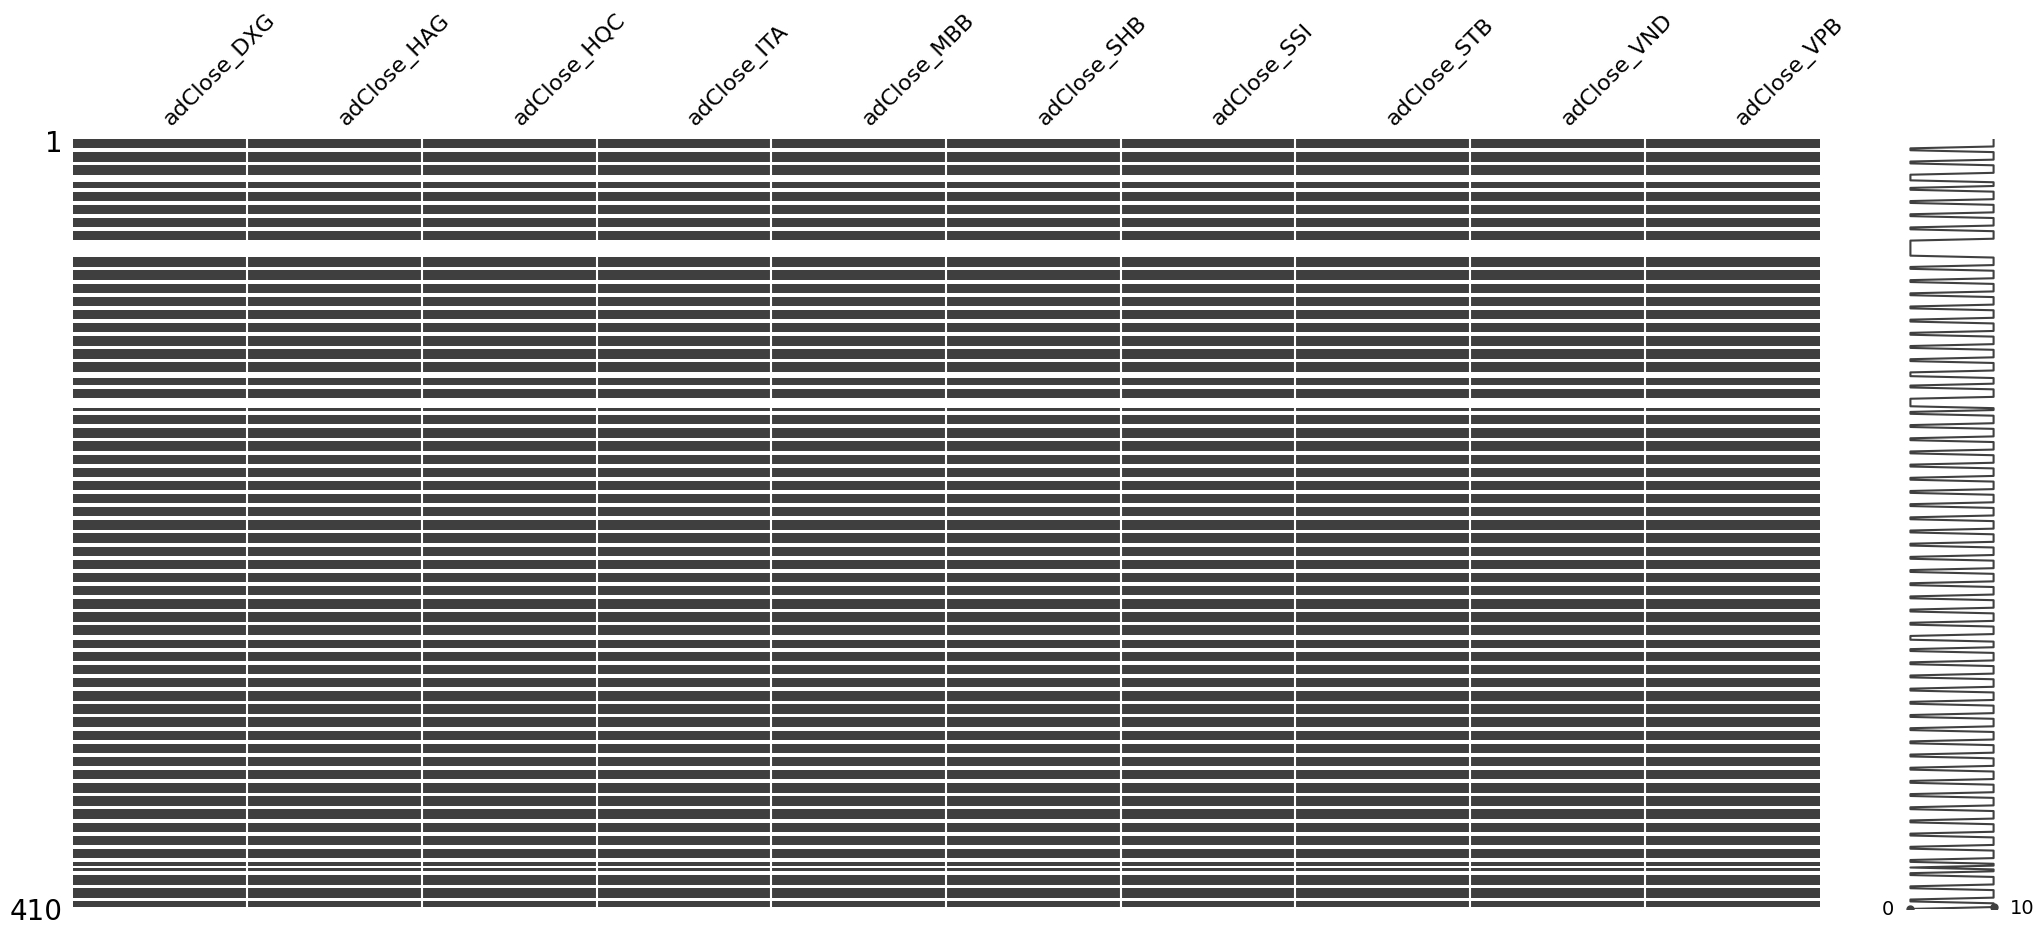

In [31]:
# Visualization of position of missing values
msno.matrix(df_finance_resampled_first_period)

In [32]:
# LOCF method. Fill missing values with value of the previous instance
# Fill the first period 
df_finance_processed_first_period = df_finance_resampled_first_period.fillna(method='ffill')

In [33]:
# Fill the second period 
df_finance_processed_second_period = df_finance_resampled_second_period.fillna(method='ffill')

In [34]:
# Fill the third period 
df_finance_processed_third_period = df_finance_resampled_third_period.fillna(method='ffill')

In [35]:
# Count of missing values and percentage of missing values of each stock (column) after missing values being filled 
hdf.calculate_missing_percentage(
    df_finance_processed_first_period
)

,column,percentage,count
0,adClose_DXG,0.0,0
1,adClose_HAG,0.0,0
2,adClose_HQC,0.0,0
3,adClose_ITA,0.0,0
4,adClose_MBB,0.0,0
5,adClose_SHB,0.0,0
6,adClose_SSI,0.0,0
7,adClose_STB,0.0,0
8,adClose_VND,0.0,0
9,adClose_VPB,0.0,0


In [36]:
# Save to processed data 
df_finance_processed_first_period.to_csv(
    f"..//..//..//data//processed//finance//df_finance_processed_first_period_{hdt.today_date_to_digits()}.csv"
    )

df_finance_processed_second_period.to_csv(
    f"..//..//..//data//processed//finance//df_finance_processed_second_period_{hdt.today_date_to_digits()}.csv"
    )

df_finance_processed_third_period.to_csv(
    f"..//..//..//data//processed//finance//df_finance_processed_third_period_{hdt.today_date_to_digits()}.csv"
    )

# **Tech Data Preprocessing**

## **Basic exploration**

In [20]:
df_raw_tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90584 entries, 0 to 90583
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      90584 non-null  int64  
 1   code            90584 non-null  object 
 2   date            90584 non-null  object 
 3   time            90584 non-null  object 
 4   floor           90584 non-null  object 
 5   type            90584 non-null  object 
 6   basicPrice      90584 non-null  float64
 7   ceilingPrice    90584 non-null  float64
 8   floorPrice      90584 non-null  float64
 9   open            90584 non-null  float64
 10  high            90584 non-null  float64
 11  low             90584 non-null  float64
 12  close           90584 non-null  float64
 13  average         90584 non-null  float64
 14  adOpen          90584 non-null  float64
 15  adHigh          90584 non-null  float64
 16  adLow           90584 non-null  float64
 17  adClose         90584 non-null 

In [21]:
# Count the duplicated rows
df_raw_tech.duplicated().sum()

0

In [22]:
# Count of unique values
df_raw_tech.nunique()

Unnamed: 0        90584
code                 39
date               2666
time                666
floor                 3
type                  1
basicPrice         2013
ceilingPrice       2012
floorPrice         1928
open               1986
high               1978
low                1978
close              2011
average           16293
adOpen            11415
adHigh            11455
adLow             11252
adClose           11319
adAverage         18547
nmVolume          19724
nmValue           39329
ptVolume            695
ptValue            1100
change              342
adChange           7974
pctChange          8784
vietnameseName        1
dtype: int64

## **Select stocks for analysis**

In [23]:
# Select relevant fields
df_raw_tech_selected = df_raw_tech[[
    'date',
    'floor',
    'code',
    'nmVolume',
    'adClose'
    ]]

# Display selected dataframe
df_raw_tech_selected

,date,floor,code,nmVolume,adClose
0,2023-09-08,UPCOM,HIG,1003.0,8.300
1,2023-09-08,UPCOM,PMT,0.0,6.900
2,2023-09-08,HNX,POT,632.0,18.600
3,2023-09-08,HOSE,ELC,497800.0,24.050
4,2023-09-08,UPCOM,ONW,6900.0,3.800
...,...,...,...,...,...
90579,2019-07-31,UPCOM,PMJ,0.0,10.780
90580,2019-07-31,UPCOM,PMT,0.0,4.072
90581,2019-07-31,HNX,ONE,900.0,3.217
90582,2019-07-31,UPCOM,SBD,0.0,7.598


In [24]:
# Count the duplicated rows
df_raw_tech_selected.duplicated().sum()

2757

In [25]:
# Drop the duplicated rows and keep the first occurence
df_raw_tech_selected = df_raw_tech_selected.drop_duplicates()
df_raw_tech_selected.duplicated().sum()

0

In [26]:
# List of exchange floors in the dataset
df_raw_tech_selected['floor'].unique()

array(['UPCOM', 'HNX', 'HOSE'], dtype=object)

In [27]:
# List of floors in focus
lst_floors = ['HOSE', 'HNX']

# Use .loc to select rows of the stocks listed on HOSE or HNX
df_raw_tech_selected = df_raw_tech_selected[
    df_raw_tech_selected['floor'].isin(lst_floors)]

# Display result dataframe
df_raw_tech_selected

,date,floor,code,nmVolume,adClose
2,2023-09-08,HNX,POT,632.0,18.600
3,2023-09-08,HOSE,ELC,497800.0,24.050
6,2023-09-08,HNX,KST,1500.0,14.000
8,2023-09-08,HOSE,SAM,821000.0,7.720
10,2023-09-08,HOSE,SGT,207300.0,15.350
...,...,...,...,...,...
87904,2019-04-11,HNX,KST,0.0,5.469
87905,2019-04-11,HOSE,SGT,125640.0,4.821
87906,2019-04-11,HNX,VTH,0.0,6.046
87907,2019-04-11,HOSE,SAM,38870.0,6.441


In [28]:
# Cast type of the date column 
df_raw_tech_selected['date'] = pd.to_datetime(df_raw_tech_selected['date'])

In [47]:
# Constraint: only work with the stocks that have the data in the analysis period (from the start date of the first phase to the end date of the third phase)
# Filter rows where the 'date' falls between START_DATE_PHASE_1 and END_DATE_PHASE_3
df_raw_tech_filtered = df_raw_tech_selected[
    (df_raw_tech_selected['date'] >= START_DATE_PHASE_1) &
     (df_raw_tech_selected['date'] <= END_DATE_PHASE_3)]

# Display the result dataframe
df_raw_tech_filtered

,date,floor,code,nmVolume,adClose
141,2023-08-31,HOSE,ELC,398500.0,25.250
142,2023-08-31,HOSE,FPT,1403700.0,96.700
143,2023-08-31,HNX,VTH,4500.0,7.700
147,2023-08-31,HNX,PIA,0.0,25.800
150,2023-08-31,HOSE,SAM,683600.0,7.640
...,...,...,...,...,...
87904,2019-04-11,HNX,KST,0.0,5.469
87905,2019-04-11,HOSE,SGT,125640.0,4.821
87906,2019-04-11,HNX,VTH,0.0,6.046
87907,2019-04-11,HOSE,SAM,38870.0,6.441


In [48]:
# Finance stocks exploration summary table
tech_stock_exploration_table = xstock.stock_exploration(
    df_raw_tech_filtered
)

# Display the summary table
tech_stock_exploration_table

,code,floor,start_date,end_date,number_of_days,vol_non_null_all,vol_missing_pct_all,vol_avg_all,vol_std_all,adclose_non_null_all,adclose_missing_pct_all
0,ELC,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,348358.60,420238.60,1179,0.0
1,FPT,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,1706473.60,1085949.47,1178,0.0
2,VTH,HNX,2018-12-10,2023-08-31,1180,1180,0.0,479.45,2315.27,1180,0.0
3,PIA,HNX,2019-09-06,2023-08-31,996,996,0.0,884.64,2875.43,996,0.0
4,SAM,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,753743.83,1104822.33,1179,0.0
5,ONE,HNX,2018-12-10,2023-08-31,1178,1178,0.0,24215.70,47930.80,1178,0.0
6,PSD,HNX,2018-12-10,2023-08-31,1178,1178,0.0,44955.97,73825.50,1178,0.0
7,ICT,HOSE,2020-01-15,2023-08-31,906,906,0.0,74822.30,110823.33,906,0.0
8,KST,HNX,2018-12-10,2023-08-31,1179,1179,0.0,618.24,2294.99,1179,0.0
9,ST8,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,32970.20,91666.52,1179,0.0


In [49]:
# Constraint: select 10 stocks that have the highest average volume traded in the whole period from start date of the first phase to end date of the third phase

# Sort the summary table from the latest end date, earliest start date, and from the highest average value of trading volume 
tech_stock_exploration_table_sorted = tech_stock_exploration_table.sort_values(
    by=['vol_avg_all'],
    ascending=[False]
    )

# Display the result
tech_stock_exploration_table_sorted

,code,floor,start_date,end_date,number_of_days,vol_non_null_all,vol_missing_pct_all,vol_avg_all,vol_std_all,adclose_non_null_all,adclose_missing_pct_all
1,FPT,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,1706473.60,1085949.47,1178,0.0
4,SAM,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,753743.83,1104822.33,1179,0.0
23,VHG,HOSE,2018-12-10,2019-05-22,107,107,0.0,704053.27,1091778.74,107,0.0
14,SRA,HNX,2018-12-10,2023-08-31,1180,1180,0.0,353169.09,404314.57,1180,0.0
0,ELC,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,348358.60,420238.60,1179,0.0
17,ITD,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,128708.06,212228.53,1178,0.0
13,SGT,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,97015.76,197511.59,1179,0.0
18,CMG,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,75357.83,78669.01,1180,0.0
7,ICT,HOSE,2020-01-15,2023-08-31,906,906,0.0,74822.30,110823.33,906,0.0
6,PSD,HNX,2018-12-10,2023-08-31,1178,1178,0.0,44955.97,73825.50,1178,0.0


In [50]:
# Select the 10 stocks that have the greatest value of average volume traded in the whole period
tech_stock_exploration_table_sorted.head(12)

,code,floor,start_date,end_date,number_of_days,vol_non_null_all,vol_missing_pct_all,vol_avg_all,vol_std_all,adclose_non_null_all,adclose_missing_pct_all
1,FPT,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,1706473.60,1085949.47,1178,0.0
4,SAM,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,753743.83,1104822.33,1179,0.0
23,VHG,HOSE,2018-12-10,2019-05-22,107,107,0.0,704053.27,1091778.74,107,0.0
14,SRA,HNX,2018-12-10,2023-08-31,1180,1180,0.0,353169.09,404314.57,1180,0.0
0,ELC,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,348358.60,420238.60,1179,0.0
17,ITD,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,128708.06,212228.53,1178,0.0
13,SGT,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,97015.76,197511.59,1179,0.0
18,CMG,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,75357.83,78669.01,1180,0.0
7,ICT,HOSE,2020-01-15,2023-08-31,906,906,0.0,74822.30,110823.33,906,0.0
6,PSD,HNX,2018-12-10,2023-08-31,1178,1178,0.0,44955.97,73825.50,1178,0.0


In [51]:
# Select the stocks that have the start date and end date the same as the required dates in the analysis phase
tech_lst_stock_selected = tech_stock_exploration_table.sort_values(
    by=['start_date', 'end_date','vol_avg_all'],
    ascending=[True, False, False]
    ).head(10)['code'].tolist()

# Display the list of selected stock
tech_lst_stock_selected

['FPT', 'SAM', 'SRA', 'ELC', 'ITD', 'SGT', 'CMG', 'PSD', 'ST8', 'TYA']

In [52]:
# Extract data of selected stocks 
df_raw_tech_stock_selected = df_raw_tech_filtered[
    df_raw_tech_filtered['code'].isin(tech_lst_stock_selected)]

# Display result dataframe
df_raw_tech_stock_selected

,date,floor,code,nmVolume,adClose
141,2023-08-31,HOSE,ELC,398500.0,25.250
142,2023-08-31,HOSE,FPT,1403700.0,96.700
150,2023-08-31,HOSE,SAM,683600.0,7.640
153,2023-08-31,HNX,PSD,47070.0,17.200
158,2023-08-31,HOSE,ST8,28200.0,21.950
...,...,...,...,...,...
87902,2019-04-11,HOSE,CMG,42030.0,19.893
87903,2019-04-11,HOSE,ELC,15970.0,5.415
87905,2019-04-11,HOSE,SGT,125640.0,4.821
87907,2019-04-11,HOSE,SAM,38870.0,6.441


## **Pivot the data**

In [53]:
# Wrangle the selected data 
df_tech_stock_selected_pivoted = hdf.reformat_dataframe(
    df = df_raw_tech_stock_selected, 
    index_col = 'date', 
    columns_col = 'code', 
    values_col = ['adClose'], 
    prefix=''
    )

# Display the result dataframe
df_tech_stock_selected_pivoted

,date,adClose_CMG,adClose_ELC,adClose_FPT,adClose_ITD,adClose_PSD,adClose_SAM,adClose_SGT,adClose_SRA,adClose_ST8,adClose_TYA
0,2018-12-10,14.860,6.472,19.072,6.673,7.794,5.959,3.774,10.390,10.057,6.507
1,2018-12-11,15.339,6.316,19.007,6.733,7.794,5.816,3.774,10.715,10.057,6.507
2,2018-12-12,14.620,6.316,19.180,6.643,7.014,5.825,3.774,11.345,10.057,6.507
3,2018-12-13,14.890,6.472,19.244,6.703,6.372,5.783,3.774,10.855,10.736,6.507
4,2018-12-14,14.860,6.472,19.050,6.643,6.419,5.732,3.753,11.927,10.736,6.539
...,...,...,...,...,...,...,...,...,...,...,...
1176,2023-08-25,49.900,24.150,90.600,10.400,16.300,7.380,14.900,4.300,21.350,10.500
1177,2023-08-28,50.200,24.500,94.000,10.400,16.500,7.360,15.000,4.300,21.600,10.400
1178,2023-08-29,50.400,24.100,93.600,10.550,16.800,7.450,15.000,4.400,21.600,10.500
1179,2023-08-30,50.500,24.700,96.600,10.500,17.100,7.590,15.200,4.300,21.600,10.600


In [54]:
# Evenly space the date by one day 
df_tech_stock_selected_resampled = hdf.resample_dataframe(
    df = df_tech_stock_selected_pivoted,
    date_column = 'date',
    space_freq = 'D'
)

# Display the resampled dataset 
df_tech_stock_selected_resampled

,adClose_CMG,adClose_ELC,adClose_FPT,adClose_ITD,adClose_PSD,adClose_SAM,adClose_SGT,adClose_SRA,adClose_ST8,adClose_TYA
date,,,,,,,,,,
2018-12-10,14.860,6.472,19.072,6.673,7.794,5.959,3.774,10.390,10.057,6.507
2018-12-11,15.339,6.316,19.007,6.733,7.794,5.816,3.774,10.715,10.057,6.507
2018-12-12,14.620,6.316,19.180,6.643,7.014,5.825,3.774,11.345,10.057,6.507
2018-12-13,14.890,6.472,19.244,6.703,6.372,5.783,3.774,10.855,10.736,6.507
2018-12-14,14.860,6.472,19.050,6.643,6.419,5.732,3.753,11.927,10.736,6.539
...,...,...,...,...,...,...,...,...,...,...
2023-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-28,50.200,24.500,94.000,10.400,16.500,7.360,15.000,4.300,21.600,10.400
2023-08-29,50.400,24.100,93.600,10.550,16.800,7.450,15.000,4.400,21.600,10.500


## **Split data**

In [55]:
# Split the first period 
df_tech_resampled_first_period = df_tech_stock_selected_resampled[
    START_DATE_PHASE_1:END_DATE_PHASE_1
    ] 

In [56]:
# Split the second period 
df_tech_resampled_second_period = df_tech_stock_selected_resampled[
    START_DATE_PHASE_2:END_DATE_PHASE_2
    ] 

In [57]:
# Split the third period 
df_tech_resampled_third_period = df_tech_stock_selected_resampled[
    START_DATE_PHASE_3:END_DATE_PHASE_3
    ] 

## **Filling missing values**

In [58]:
# Count of missing values and percentage of missing values of each stock (column)
hdf.calculate_missing_percentage(
    df_tech_stock_selected_resampled
)

,column,percentage,count
0,adClose_CMG,31.633835,546
1,adClose_ELC,31.691773,547
2,adClose_FPT,31.749710,548
3,adClose_ITD,31.749710,548
4,adClose_PSD,31.749710,548
5,adClose_SAM,31.691773,547
6,adClose_SGT,31.691773,547
7,adClose_SRA,31.633835,546
8,adClose_ST8,31.691773,547
9,adClose_TYA,31.807648,549


<AxesSubplot:>

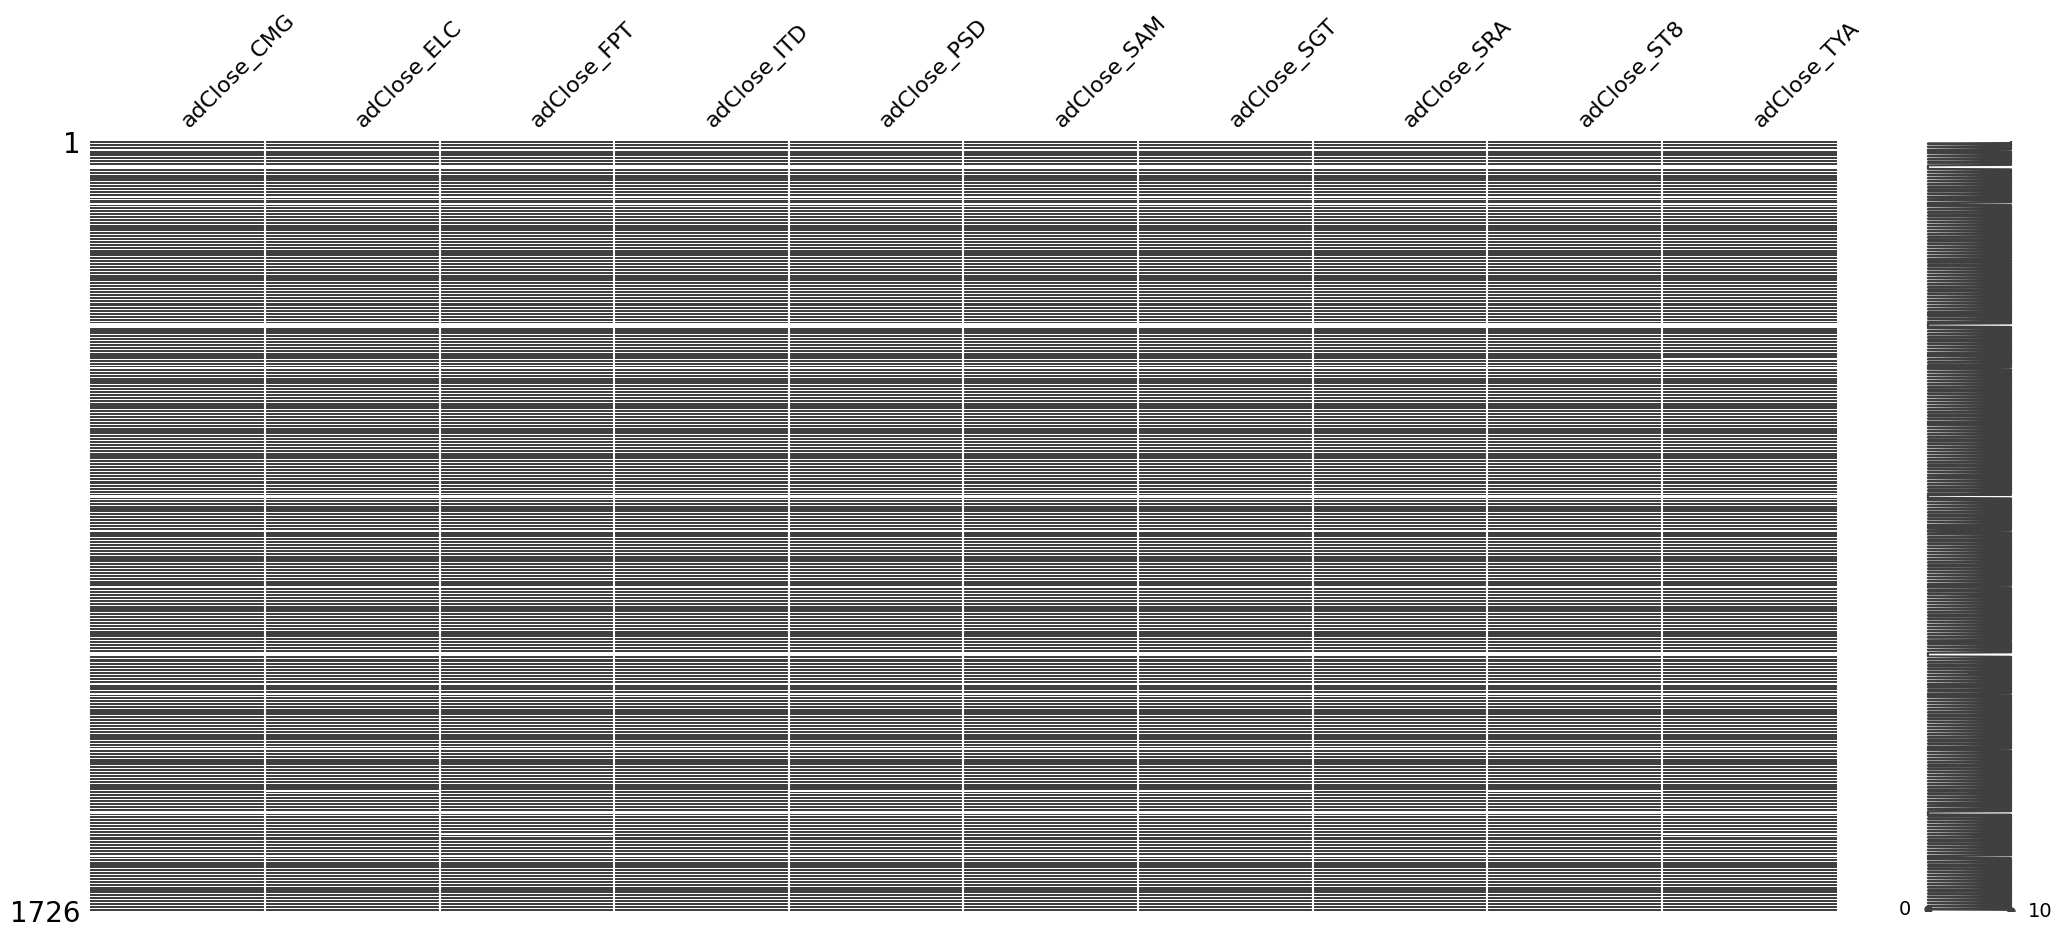

In [59]:
# Visualization of position of missing values
msno.matrix(df_tech_stock_selected_resampled)

In [85]:
# LOCF method. Fill missing values with value of the previous instance
# Fill the first period 
df_tech_processed_first_period = df_tech_resampled_first_period.fillna(method='ffill')

In [86]:
# Fill the first period 
df_tech_processed_second_period = df_tech_resampled_second_period.fillna(method='ffill')

In [87]:
# Fill the first period 
df_tech_processed_third_period = df_tech_resampled_third_period.fillna(method='ffill')

In [88]:
# Count of missing values and percentage of missing values of each stock (column) after missing values being filled 
hdf.calculate_missing_percentage(
    df_tech_processed_first_period
)

,column,percentage,count
0,adClose_CMG,0.0,0
1,adClose_ELC,0.0,0
2,adClose_FPT,0.0,0
3,adClose_ITD,0.0,0
4,adClose_PSD,0.0,0
5,adClose_SAM,0.0,0
6,adClose_SGT,0.0,0
7,adClose_SRA,0.0,0
8,adClose_ST8,0.0,0
9,adClose_TYA,0.0,0


In [89]:
# Save to processed data 
df_tech_processed_first_period.to_csv(
    f"..//..//..//data//processed//tech//df_tech_processed_first_period_{hdt.today_date_to_digits()}.csv"
    )

df_tech_processed_second_period.to_csv(
    f"..//..//..//data//processed//tech//df_tech_processed_second_period_{hdt.today_date_to_digits()}.csv"
    )

df_finance_processed_third_period.to_csv(
    f"..//..//..//data//processed//tech//df_tech_processed_third_period_{hdt.today_date_to_digits()}.csv"
    )

# **Consumer Good Data Preprocessing**

## **Basic exploration**

In [30]:
df_raw_consumer_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529826 entries, 0 to 529825
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      529826 non-null  int64  
 1   code            529826 non-null  object 
 2   date            529826 non-null  object 
 3   time            529826 non-null  object 
 4   floor           529826 non-null  object 
 5   type            529826 non-null  object 
 6   basicPrice      529826 non-null  float64
 7   ceilingPrice    529826 non-null  float64
 8   floorPrice      529826 non-null  float64
 9   open            529826 non-null  float64
 10  high            529826 non-null  float64
 11  low             529826 non-null  float64
 12  close           529826 non-null  float64
 13  average         529826 non-null  float64
 14  adOpen          529826 non-null  float64
 15  adHigh          529826 non-null  float64
 16  adLow           529826 non-null  float64
 17  adClose   

In [31]:
# Count the duplicated rows
df_raw_consumer_good.duplicated().sum()

0

In [32]:
# Count of unique values
df_raw_consumer_good.nunique()

Unnamed: 0        529826
code                 291
date                2666
time                 684
floor                  3
type                   1
basicPrice          3667
ceilingPrice        3795
floorPrice          3474
open                3665
high                3668
low                 3651
close               3649
average            55335
adOpen             44921
adHigh             45134
adLow              44179
adClose            44339
adAverage          60376
nmVolume           80439
nmValue           200098
ptVolume            3478
ptValue             6774
change               708
adChange           33934
pctChange          27552
vietnameseName         1
dtype: int64

## **Select stocks for analysis**

In [33]:
# Select relevant fields
df_raw_consumer_good_selected = df_raw_consumer_good[[
    'date',
    'floor',
    'code',
    'nmVolume',
    'adClose'
    ]]

# Display selected dataframe
df_raw_consumer_good_selected

,date,floor,code,nmVolume,adClose
0,2023-09-08,UPCOM,VTQ,0.0,38.300
1,2023-09-08,UPCOM,NGC,0.0,3.400
2,2023-09-08,HOSE,DRC,474800.0,23.400
3,2023-09-08,HOSE,NAF,93100.0,17.200
4,2023-09-08,HOSE,SAV,32700.0,17.400
...,...,...,...,...,...
529821,2019-07-31,UPCOM,BSH,0.0,18.289
529822,2019-07-31,UPCOM,NHT,112.0,22.671
529823,2019-07-31,UPCOM,BMG,0.0,18.031
529824,2019-07-31,HNX,KHS,28500.0,9.104


In [34]:
# Count the duplicated rows
df_raw_consumer_good_selected.duplicated().sum()

18308

In [35]:
# Drop the duplicated rows and keep the first occurence
df_raw_consumer_good_selected = df_raw_consumer_good_selected.drop_duplicates()
df_raw_consumer_good_selected.duplicated().sum()

0

In [36]:
# List of exchange floors in the dataset
df_raw_consumer_good_selected['floor'].unique()

array(['UPCOM', 'HOSE', 'HNX'], dtype=object)

In [37]:
# List of floors in focus
lst_floors = ['HOSE', 'HNX']

# Use .loc to select rows of the stocks listed on HOSE or HNX
df_raw_consumer_good_selected = df_raw_consumer_good_selected[
    df_raw_consumer_good_selected['floor'].isin(lst_floors)]

# Display result dataframe
df_raw_consumer_good_selected

,date,floor,code,nmVolume,adClose
2,2023-09-08,HOSE,DRC,474800.0,23.400
3,2023-09-08,HOSE,NAF,93100.0,17.200
4,2023-09-08,HOSE,SAV,32700.0,17.400
5,2023-09-08,HOSE,BBC,300.0,59.600
12,2023-09-08,HOSE,VCF,800.0,199.400
...,...,...,...,...,...
528748,2019-07-24,HNX,HAD,100.0,13.466
528989,2019-07-25,HNX,HAD,7049.0,13.765
529231,2019-07-26,HNX,HAD,1760.0,13.765
529473,2019-07-29,HNX,HAD,4100.0,13.765


In [38]:
# Cast type of the date column 
df_raw_consumer_good_selected['date'] = pd.to_datetime(df_raw_consumer_good_selected['date'])

In [72]:
# Constraint: only work with the stocks that have the data in the analysis period (from the start date of the first phase to the end date of the third phase)
# Filter rows where the 'date' falls between START_DATE_PHASE_1 and END_DATE_PHASE_3
df_raw_consumer_good_filtered = df_raw_consumer_good_selected[
    (df_raw_consumer_good_selected['date'] >= START_DATE_PHASE_1) &
     (df_raw_consumer_good_selected['date'] <= END_DATE_PHASE_3)]

# Display the result dataframe
df_raw_consumer_good_filtered

,date,floor,code,nmVolume,adClose
968,2023-08-31,HNX,SLS,126359.0,206.000
971,2023-08-31,HOSE,CMX,1354800.0,10.850
972,2023-08-31,HOSE,KMR,140600.0,3.750
973,2023-08-31,HOSE,DLG,2281100.0,3.080
977,2023-08-31,HOSE,LAF,6900.0,13.300
...,...,...,...,...,...
528748,2019-07-24,HNX,HAD,100.0,13.466
528989,2019-07-25,HNX,HAD,7049.0,13.765
529231,2019-07-26,HNX,HAD,1760.0,13.765
529473,2019-07-29,HNX,HAD,4100.0,13.765


In [73]:
# consumer_good stocks exploration summary table
consumer_good_stock_exploration_table = xstock.stock_exploration(
    df_raw_consumer_good_filtered
)

# Display the summary table
consumer_good_stock_exploration_table

,code,floor,start_date,end_date,number_of_days,vol_non_null_all,vol_missing_pct_all,vol_avg_all,vol_std_all,adclose_non_null_all,adclose_missing_pct_all
0,SLS,HNX,2018-12-10,2023-08-31,1179,1179,0.0,10651.11,12676.27,1179,0.0
1,CMX,HOSE,2018-12-10,2023-08-31,1181,1181,0.0,698246.28,857913.69,1181,0.0
2,KMR,HOSE,2018-12-10,2023-08-31,1181,1181,0.0,251369.01,393630.72,1181,0.0
3,DLG,HOSE,2018-12-10,2023-08-31,1181,1181,0.0,5165652.20,5148187.06,1181,0.0
4,LAF,HOSE,2018-12-10,2023-08-31,1171,1171,0.0,2447.17,5963.14,1171,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,NDF,HNX,2018-12-10,2019-11-08,228,228,0.0,0.00,0.00,228,0.0
107,HLG,HOSE,2018-12-10,2019-09-06,183,183,0.0,2520.16,11098.98,183,0.0
108,ASA,HNX,2018-12-10,2019-06-12,122,122,0.0,0.00,0.00,122,0.0
109,DCS,HNX,2018-12-10,2019-05-23,108,108,0.0,318168.92,421913.96,108,0.0


In [74]:
# Constraint: select 10 stocks that have the highest average volume traded in the whole period from start date of the first phase to end date of the third phase

# Sort the summary table from the latest end date, earliest start date, and from the highest average value of trading volume 
consumer_good_stock_exploration_table_sorted = consumer_good_stock_exploration_table.sort_values(
    by=['vol_avg_all'],
    ascending=[False]
    )

# Display the result
consumer_good_stock_exploration_table_sorted

,code,floor,start_date,end_date,number_of_days,vol_non_null_all,vol_missing_pct_all,vol_avg_all,vol_std_all,adclose_non_null_all,adclose_missing_pct_all
14,HNG,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,5178825.55,6210277.00,1180,0.0
3,DLG,HOSE,2018-12-10,2023-08-31,1181,1181,0.0,5165652.20,5148187.06,1181,0.0
7,TTF,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,3635591.98,3607191.99,1179,0.0
61,SBT,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,2960113.79,2065327.24,1178,0.0
23,IDI,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,2593748.97,2300401.35,1180,0.0
...,...,...,...,...,...,...,...,...,...,...,...
92,VTL,HNX,2018-12-10,2023-05-18,1105,1105,0.0,232.21,1138.59,1105,0.0
72,TET,HNX,2018-12-10,2023-08-31,1180,1180,0.0,65.06,944.76,1180,0.0
106,NDF,HNX,2018-12-10,2019-11-08,228,228,0.0,0.00,0.00,228,0.0
105,SGO,HNX,2018-12-10,2019-12-19,257,257,0.0,0.00,0.00,257,0.0


In [75]:
# Select the 10 stocks that have the greatest value of average volume traded in the whole period
consumer_good_stock_exploration_table_sorted.head(11)

,code,floor,start_date,end_date,number_of_days,vol_non_null_all,vol_missing_pct_all,vol_avg_all,vol_std_all,adclose_non_null_all,adclose_missing_pct_all
14,HNG,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,5178825.55,6210277.00,1180,0.0
3,DLG,HOSE,2018-12-10,2023-08-31,1181,1181,0.0,5165652.20,5148187.06,1181,0.0
7,TTF,HOSE,2018-12-10,2023-08-31,1179,1179,0.0,3635591.98,3607191.99,1179,0.0
61,SBT,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,2960113.79,2065327.24,1178,0.0
23,IDI,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,2593748.97,2300401.35,1180,0.0
54,HHS,HOSE,2018-12-10,2023-08-31,1177,1177,0.0,2561354.82,2377211.82,1177,0.0
89,DBC,HOSE,2018-12-10,2023-08-31,1174,1174,0.0,2410158.96,2480188.73,1174,0.0
18,BAF,HOSE,2021-12-03,2023-08-31,435,435,0.0,2233036.09,1379071.20,435,0.0
78,TSC,HOSE,2018-12-10,2023-08-31,1180,1180,0.0,2062064.92,2562044.65,1180,0.0
84,VNM,HOSE,2018-12-10,2023-08-31,1178,1178,0.0,2032586.79,1419574.47,1178,0.0


In [76]:
# Select the stocks that have the start date and end date the same as the required dates in the analysis phase
consumer_good_lst_stock_selected = consumer_good_stock_exploration_table.sort_values(
    by=['start_date', 'end_date','vol_avg_all'],
    ascending=[True, False, False]
    ).head(10)['code'].tolist()

# Display the list of selected stock
consumer_good_lst_stock_selected

['HNG', 'DLG', 'TTF', 'SBT', 'IDI', 'HHS', 'DBC', 'TSC', 'VNM', 'TNG']

In [77]:
# Extract data of selected stocks 
df_raw_consumer_good_stock_selected = df_raw_consumer_good_filtered[
    df_raw_consumer_good_filtered['code'].isin(consumer_good_lst_stock_selected)]

# Display result dataframe
df_raw_consumer_good_stock_selected

,date,floor,code,nmVolume,adClose
973,2023-08-31,HOSE,DLG,2281100.0,3.080
983,2023-08-31,HOSE,TTF,3638900.0,5.480
992,2023-08-31,HOSE,HNG,3771400.0,4.150
999,2023-08-31,HNX,TNG,3406337.0,20.200
1016,2023-08-31,HOSE,IDI,3675800.0,13.900
...,...,...,...,...,...
511810,2019-04-10,HOSE,HHS,1507290.0,2.930
511873,2019-04-11,HOSE,HNG,310980.0,15.150
511939,2019-04-11,HOSE,IDI,1201990.0,6.638
511984,2019-04-11,HNX,DBC,21522.0,7.555


## **Pivot the data**

In [78]:
# Wrangle the selected data 
df_consumer_good_stock_selected_pivoted = hdf.reformat_dataframe(
    df = df_raw_consumer_good_stock_selected, 
    index_col = 'date', 
    columns_col = 'code', 
    values_col = ['adClose'], 
    prefix=''
    )

# Display the result dataframe
df_consumer_good_stock_selected_pivoted

,date,adClose_DBC,adClose_DLG,adClose_HHS,adClose_HNG,adClose_IDI,adClose_SBT,adClose_TNG,adClose_TSC,adClose_TTF,adClose_VNM
0,2018-12-10,8.335,1.86,3.047,17.05,7.743,14.978,9.755,1.267,3.95,90.940
1,2018-12-11,8.367,1.85,3.025,16.90,7.705,14.941,9.704,1.267,3.72,90.805
2,2018-12-12,8.335,1.82,3.075,16.85,7.780,15.015,9.704,1.258,3.74,90.266
3,2018-12-13,8.429,1.79,3.039,16.70,7.818,15.610,9.908,1.258,3.71,90.940
4,2018-12-14,8.335,1.79,3.025,16.75,7.780,15.313,9.806,1.258,3.70,90.940
...,...,...,...,...,...,...,...,...,...,...,...
1176,2023-08-25,23.250,3.00,7.030,4.00,13.400,15.750,19.000,5.260,5.30,74.900
1177,2023-08-28,23.750,3.05,7.060,4.06,13.450,15.850,18.900,5.350,5.33,77.900
1178,2023-08-29,23.800,3.10,7.350,4.09,13.250,16.200,19.200,5.470,5.41,77.400
1179,2023-08-30,23.500,3.07,7.580,4.10,13.800,16.100,19.400,5.520,5.38,77.800


In [79]:
# Evenly space the date by one day 
df_consumer_good_stock_selected_resampled = hdf.resample_dataframe(
    df = df_consumer_good_stock_selected_pivoted,
    date_column = 'date',
    space_freq = 'D'
)

# Display the resampled dataset 
df_consumer_good_stock_selected_resampled

,adClose_DBC,adClose_DLG,adClose_HHS,adClose_HNG,adClose_IDI,adClose_SBT,adClose_TNG,adClose_TSC,adClose_TTF,adClose_VNM
date,,,,,,,,,,
2018-12-10,8.335,1.86,3.047,17.05,7.743,14.978,9.755,1.267,3.95,90.940
2018-12-11,8.367,1.85,3.025,16.90,7.705,14.941,9.704,1.267,3.72,90.805
2018-12-12,8.335,1.82,3.075,16.85,7.780,15.015,9.704,1.258,3.74,90.266
2018-12-13,8.429,1.79,3.039,16.70,7.818,15.610,9.908,1.258,3.71,90.940
2018-12-14,8.335,1.79,3.025,16.75,7.780,15.313,9.806,1.258,3.70,90.940
...,...,...,...,...,...,...,...,...,...,...
2023-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-28,23.750,3.05,7.060,4.06,13.450,15.850,18.900,5.350,5.33,77.900
2023-08-29,23.800,3.10,7.350,4.09,13.250,16.200,19.200,5.470,5.41,77.400


## **Split data**

In [90]:
# Split the first period 
df_consumer_good_resampled_first_period = df_consumer_good_stock_selected_resampled[
    START_DATE_PHASE_1:END_DATE_PHASE_1
    ] 

In [91]:
# Split the second period 
df_consumer_good_resampled_second_period = df_consumer_good_stock_selected_resampled[
    START_DATE_PHASE_2:END_DATE_PHASE_2
    ] 

In [92]:
# Split the third period 
df_consumer_good_resampled_third_period = df_consumer_good_stock_selected_resampled[
    START_DATE_PHASE_3:END_DATE_PHASE_3
    ] 

## **Filling missing values**

In [80]:
# Count of missing values and percentage of missing values of each stock (column)
hdf.calculate_missing_percentage(
    df_consumer_good_stock_selected_resampled
)

,column,percentage,count
0,adClose_DBC,31.981460,552
1,adClose_DLG,31.575898,545
2,adClose_HHS,31.807648,549
3,adClose_HNG,31.633835,546
4,adClose_IDI,31.633835,546
5,adClose_SBT,31.749710,548
6,adClose_TNG,31.749710,548
7,adClose_TSC,31.633835,546
8,adClose_TTF,31.691773,547
9,adClose_VNM,31.749710,548


<AxesSubplot:>

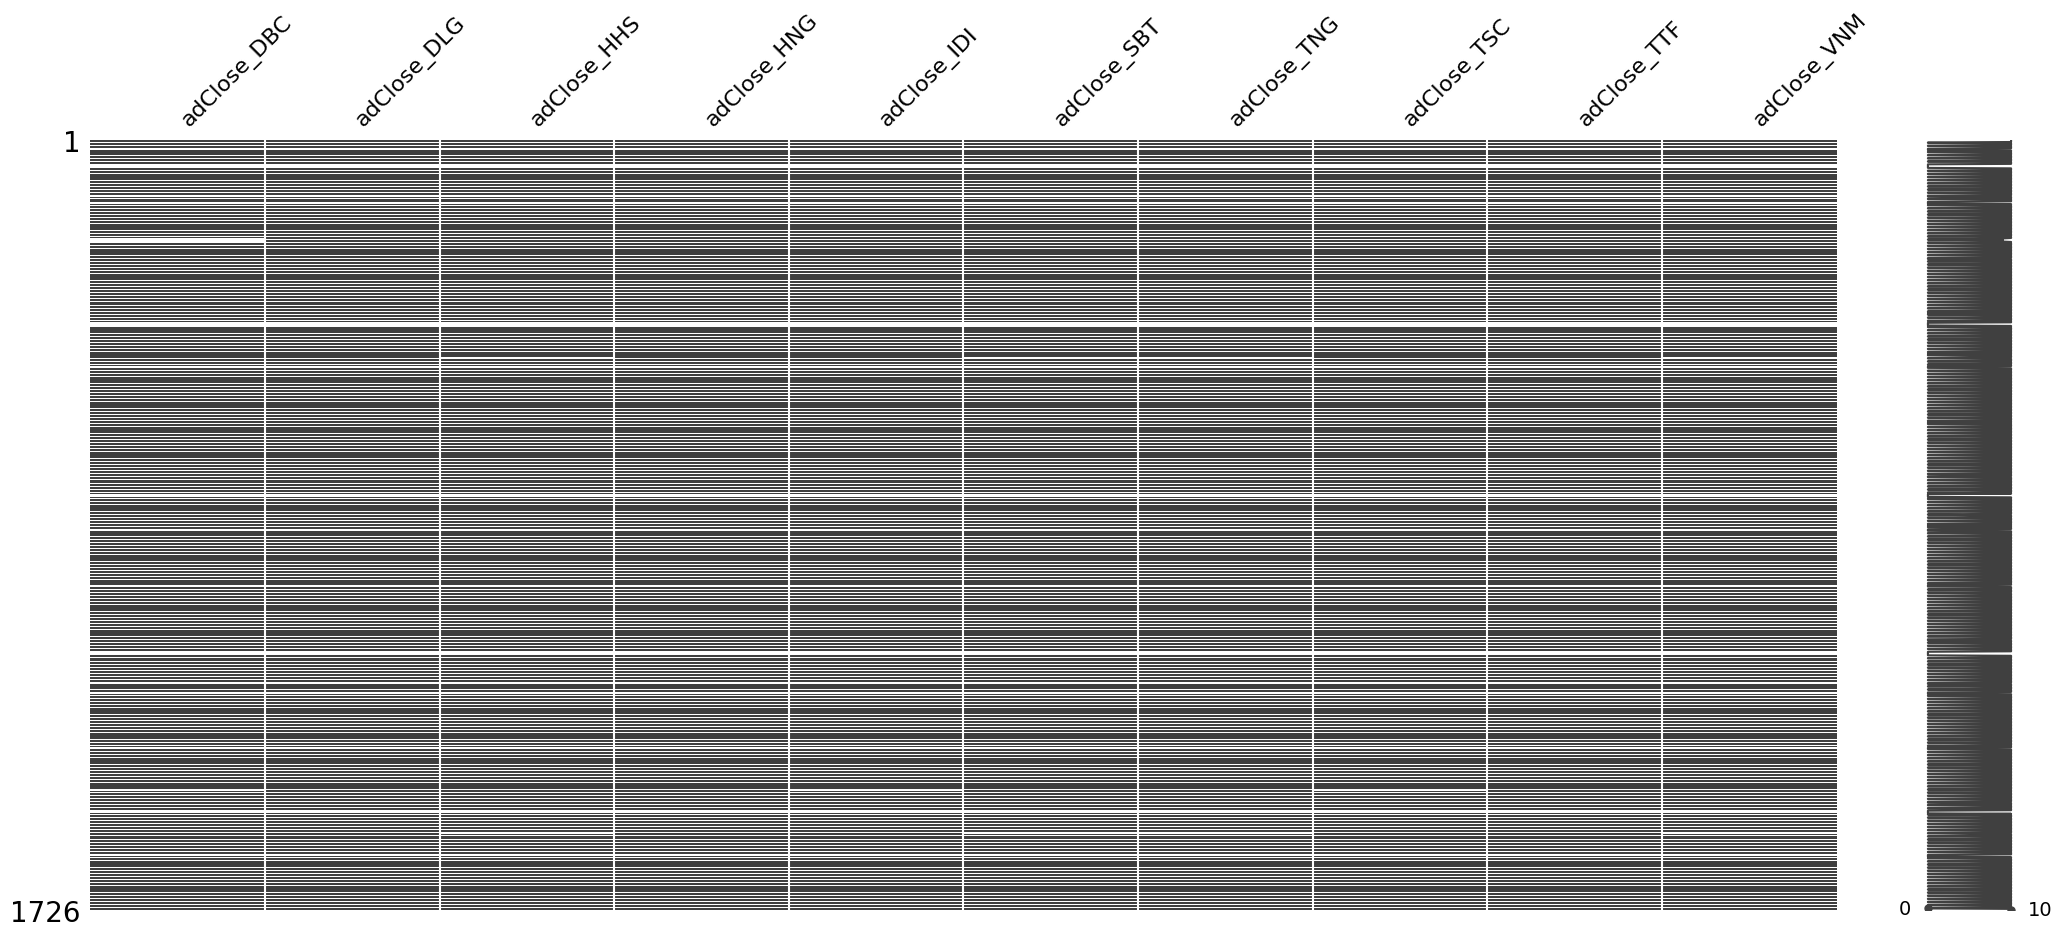

In [81]:
# Visualization of position of missing values
msno.matrix(df_consumer_good_stock_selected_resampled)

In [93]:
# LOCF method. Fill missing values with value of the previous instance
# Fill the first period 
df_consumer_good_processed_first_period = df_consumer_good_resampled_first_period.fillna(method='ffill')

In [94]:
# Fill the second period 
df_consumer_good_processed_second_period = df_consumer_good_resampled_second_period.fillna(method='ffill')

In [95]:
# Fill the third period 
df_consumer_good_processed_third_period = df_consumer_good_resampled_third_period.fillna(method='ffill')

In [96]:
# Count of missing values and percentage of missing values of each stock (column) after missing values being filled 
hdf.calculate_missing_percentage(
    df_consumer_good_processed_first_period
)

,column,percentage,count
0,adClose_DBC,0.0,0
1,adClose_DLG,0.0,0
2,adClose_HHS,0.0,0
3,adClose_HNG,0.0,0
4,adClose_IDI,0.0,0
5,adClose_SBT,0.0,0
6,adClose_TNG,0.0,0
7,adClose_TSC,0.0,0
8,adClose_TTF,0.0,0
9,adClose_VNM,0.0,0


In [97]:
# Save to processed data 
df_consumer_good_processed_first_period.to_csv(
    f"..//..//..//data//processed//consumer_good//df_consumer_good_processed_first_period_{hdt.today_date_to_digits()}.csv"
    )

df_consumer_good_processed_second_period.to_csv(
    f"..//..//..//data//processed//consumer_good//df_consumer_good_processed_second_period_{hdt.today_date_to_digits()}.csv"
    )

df_consumer_good_processed_third_period.to_csv(
    f"..//..//..//data//processed//consumer_good//df_consumer_good_processed_third_period_{hdt.today_date_to_digits()}.csv"
    )